In [1]:
#coding:utf-8
%matplotlib inline
#上面语句：使图片内嵌交互环境显示
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

In [2]:
# 科学计算用
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

# 时间序列

## 日期和时间数据类型及工具

Python标准库包含用于日期（date）和时间（time）数据的数据类型，还有日历方面的功能。主要会用到datetime、time以及calendar模块。datetime.datetime（也可以简写为datetime）是用得最多的数据类型

In [3]:
from datetime import datetime

In [4]:
now = datetime.now()
now

datetime.datetime(2018, 4, 2, 10, 38, 50, 254306)

In [5]:
now.year,now.month,now.day

(2018, 4, 2)

datetime.timedelta表示两个datetime对象之间的时间差

In [6]:
delta = datetime(2011,1,7) - datetime(2008,6,24,8,15)  # datetime以毫秒形式存储日期和时间。

In [7]:
delta

datetime.timedelta(926, 56700)

In [8]:
delta.days

926

In [9]:
delta.seconds

56700

可以给datetime对象加上（或减去）一个或多个timedelta，这样会产生一个新对象

In [10]:
from datetime import timedelta

In [11]:
start = datetime(2011,1,7)

In [12]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [13]:
start - 2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [14]:
%%html
<img src='pic\datetime模块中的数据类型.png' width=50%>

## 字符串和datetime的相互转换

利用str或strftime方法（传入一个格式化字符串），datetime对象和pandas的Timestamp对象可以被格式化为字符串

In [15]:
stamp = datetime(2011,1,3)

In [16]:
str(stamp)

'2011-01-03 00:00:00'

In [17]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

datetime.strptime可以用表中的这些格式化编码将字符串转换为日期

In [18]:
value = '2011-01-03'

In [19]:
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [20]:
%%html
<img src = 'pic\datetime格式定义.png'>
<img src = 'pic\datetime格式定义2.png'>
<img src = 'pic\datetime格式定义3.png'>

In [21]:
datestrs = ['7/6/2011','8/6/2011']

In [22]:
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

datetime.strptime是通过已知格式进行日期解析的最佳方式。

但是对于其他常见的日期格式，需要使用dateutil这个第三方包中的parser.parse方法

In [23]:
from dateutil.parser import parse

In [24]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

dateutil可以解析几乎所有人类能够理解的日期表示形式（中文除外）

In [25]:
parse('Jan 31,2017 9:35 PM')

datetime.datetime(2018, 1, 31, 21, 35)

在国际通用的格式中，日通常出现在月的前面，传入dayfirst=True即可解决

In [26]:
parse('10/12/2017',dayfirst=True)

datetime.datetime(2017, 12, 10, 0, 0)

pandas通常是用于处理成组日期的，不管这些日期是DataFrame的轴索引还是列。to_datetime方法可以解析多种不同的日期表示形式。对标准日期格式（如ISO8601）的解析非常快。可以处理缺失值（None、空字符串等)

In [27]:
datestrs

['7/6/2011', '8/6/2011']

In [28]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [29]:
idx = pd.to_datetime(datestrs + [None])

In [30]:
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [31]:
idx[2] #NaT（Not a Time）是pandas中时间戳数据的NA值

NaT

In [32]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

## 时间序列基础

pandas最基本的时间序列类型就是以时间戳（通常以Python字符串或datatime对象表示）为索引的Series

In [33]:
dates=[datetime(2017,1,6),datetime(2017,1,10),datetime(2017,1,13),
      datetime(2017,1,15),datetime(2017,1,18),datetime(2017,1,20)]

In [34]:
ts = Series(np.random.randn(6),index = dates)

In [35]:
ts

2017-01-06    0.060297
2017-01-10   -2.085215
2017-01-13    0.553781
2017-01-15    0.075269
2017-01-18    0.481003
2017-01-20    0.693247
dtype: float64

In [36]:
type(ts) # 可以看出datetime对象是被放在一个DatetimeIndex中，变量ts就成为一个TimeSeries

pandas.core.series.Series

In [37]:
ts.index

DatetimeIndex(['2017-01-06', '2017-01-10', '2017-01-13', '2017-01-15',
               '2017-01-18', '2017-01-20'],
              dtype='datetime64[ns]', freq=None)

In [38]:
# 跟其他Series一样，不同索引的时间序列之间的算术运算会自动按日期对齐
ts + ts[::2]

2017-01-06    0.120594
2017-01-10         NaN
2017-01-13    1.107563
2017-01-15         NaN
2017-01-18    0.962005
2017-01-20         NaN
dtype: float64

In [39]:
# pandas用NumPy的datetime64数据类型以纳秒形式存储时间戳
ts.index.dtype

dtype('<M8[ns]')

In [40]:
# DatetimeIndex中的各个标量值是pandas的Timestamp对象
stamp = ts.index[0]

In [41]:
stamp #如果有需要，TimeStamp可以随时自动转换为datetime对象

Timestamp('2017-01-06 00:00:00')

## 索引、选取、子集构造

In [42]:
# 由于TimeSeries是Series的一个子类，所以在索引以及数据选取方面它们的行为是一样的
stamp = ts.index[2]

In [43]:
ts[stamp]

0.55378133488062997

In [44]:
# 可以传入一个可以被解释为日期的字符串
ts['1/18/2017']

0.4810025717178098

In [45]:
ts['2017/1/18']

0.4810025717178098

In [46]:
# 对于较长的时间序列，只需传入“年”或“年月”即可轻松选取数据的切片
longer_ts = Series(np.random.randn(1000),
                   index = pd.date_range('1/1/2000',periods=1000))

In [47]:
longer_ts[:5],longer_ts[-5:]

(2000-01-01   -0.769500
 2000-01-02   -0.162490
 2000-01-03   -0.427646
 2000-01-04    0.395015
 2000-01-05    0.738312
 Freq: D, dtype: float64, 2002-09-22    0.289373
 2002-09-23    0.280766
 2002-09-24    1.010264
 2002-09-25    0.345787
 2002-09-26    0.949533
 Freq: D, dtype: float64)

In [48]:
longer_ts['2001']

2001-01-01    0.954546
2001-01-02    1.118380
2001-01-03   -0.405125
2001-01-04    0.028354
2001-01-05    0.373639
2001-01-06    1.491101
2001-01-07    0.410755
2001-01-08    1.302631
2001-01-09   -2.051251
2001-01-10   -0.894185
2001-01-11   -0.303176
2001-01-12   -1.825215
2001-01-13   -1.079970
2001-01-14    0.886230
2001-01-15    0.849382
2001-01-16    0.517211
2001-01-17   -0.337823
2001-01-18   -0.991180
2001-01-19   -0.063593
2001-01-20    0.641279
2001-01-21   -0.052698
2001-01-22    0.079740
2001-01-23   -0.030721
2001-01-24   -1.898236
2001-01-25    1.197548
2001-01-26   -0.139392
2001-01-27    0.339006
2001-01-28   -0.385519
2001-01-29   -0.899399
2001-01-30    1.541160
                ...   
2001-12-02    0.591493
2001-12-03   -1.991218
2001-12-04    2.388740
2001-12-05   -1.276619
2001-12-06    0.406028
2001-12-07   -0.810788
2001-12-08    0.699414
2001-12-09   -0.564852
2001-12-10   -0.095171
2001-12-11    0.000151
2001-12-12    2.132088
2001-12-13   -1.079581
2001-12-14 

In [49]:
longer_ts['2001-05']

2001-05-01    0.608431
2001-05-02    1.417982
2001-05-03    0.784957
2001-05-04    0.799779
2001-05-05    0.115562
2001-05-06   -1.243290
2001-05-07    0.487790
2001-05-08    0.824752
2001-05-09   -1.119412
2001-05-10    1.147741
2001-05-11   -0.301200
2001-05-12   -0.603578
2001-05-13   -0.742764
2001-05-14   -0.123998
2001-05-15   -0.755084
2001-05-16    0.771749
2001-05-17   -0.932680
2001-05-18    0.558909
2001-05-19   -0.661428
2001-05-20    0.655978
2001-05-21    0.154439
2001-05-22   -1.605014
2001-05-23   -1.740500
2001-05-24   -0.659757
2001-05-25    1.068233
2001-05-26    0.569276
2001-05-27    0.021608
2001-05-28    0.194540
2001-05-29    0.004769
2001-05-30    0.485553
2001-05-31    1.301314
Freq: D, dtype: float64

In [50]:
ts

2017-01-06    0.060297
2017-01-10   -2.085215
2017-01-13    0.553781
2017-01-15    0.075269
2017-01-18    0.481003
2017-01-20    0.693247
dtype: float64

In [51]:
ts[datetime(2017,1,11):] # 通过日期进行切片的方式只对规则Series有效。

2017-01-13    0.553781
2017-01-15    0.075269
2017-01-18    0.481003
2017-01-20    0.693247
dtype: float64

In [52]:
# 也可以用不存在于该时间序列中的时间戳对其进行切片（即范围查询）
ts['1/5/2017':'1/14/2017']

2017-01-06    0.060297
2017-01-10   -2.085215
2017-01-13    0.553781
dtype: float64

这里可以传入字符串日期、datetime或Timestamp。

注意，这样切片所产生的是源时间序列的视图，跟NumPy数组的切片运算是一样的。

此外，还有一个等价的实例方法也可以截取两个日期之间TimeSeries

In [53]:
ts.truncate(after = '1/13/2017')

2017-01-06    0.060297
2017-01-10   -2.085215
2017-01-13    0.553781
dtype: float64

这些操作对DataFrame也有效

In [54]:
dates=pd.date_range('1/1/2000',periods=100,freq='W-WED')
long_df=DataFrame(np.random.randn(100,4),index=dates,
                 columns=['Colorado','Texas','New York','Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.693778,0.667978,-0.827351,0.250678
2001-05-09,0.248719,0.261975,0.680602,1.030155
2001-05-16,-0.069156,0.808913,1.411202,0.123821
2001-05-23,-1.793447,0.249433,1.543335,-1.725945
2001-05-30,-0.232078,0.261459,0.334054,-0.309389


### 带有重复索引的时间序列

在某些应用场景中，可能会存在多个观测数据落在同一个时间点上的情况

In [55]:
dates=pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'])

In [56]:
dup_ts = Series(np.arange(5),index = dates)

In [57]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [58]:
#通过检查索引的is_unique属性，我们就可以知道它是不是唯一的
dup_ts.index.is_unique

False

In [59]:
# 对这个时间序列进行索引
dup_ts['1/3/2000']

4

In [60]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [61]:
# 假设你想要对具有非唯一时间戳的数据进行聚合。一个办法是使用groupby，并传入level=0（索引的唯一一层！）
grouped = dup_ts.groupby(level=0)

In [62]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [63]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 日期的范围、频率以及移动

pandas有一整套标准时间序列频率以及用于重采样、频率推断、生成固定频率日期范围的工具。

In [64]:
ts

2017-01-06    0.060297
2017-01-10   -2.085215
2017-01-13    0.553781
2017-01-15    0.075269
2017-01-18    0.481003
2017-01-20    0.693247
dtype: float64

In [65]:
resampled = ts.resample('D')

In [66]:
resampled.mean()

2017-01-06    0.060297
2017-01-07         NaN
2017-01-08         NaN
2017-01-09         NaN
2017-01-10   -2.085215
2017-01-11         NaN
2017-01-12         NaN
2017-01-13    0.553781
2017-01-14         NaN
2017-01-15    0.075269
2017-01-16         NaN
2017-01-17         NaN
2017-01-18    0.481003
2017-01-19         NaN
2017-01-20    0.693247
Freq: D, dtype: float64

### 生成日期范围

pandas.date_range可用于生成指定长度的DatetimeIndex

In [67]:
index = pd.date_range('4/1/2012','6/1/2012')

In [68]:
type(index)

pandas.core.indexes.datetimes.DatetimeIndex

默认情况下，date_range会产生按天计算的时间点。如果只传入起始或结束日期，那就还得传入一个表示一段时间的数字

In [69]:
pd.date_range(start='4/1/2012',periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [70]:
pd.date_range(end = '6/1/2012',periods = 20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

传入”BM”频率（表示business end of month），这样就只会包含时间间隔内（或刚好在边界上的）符合频率要求的日期

In [71]:
pd.date_range('1/1/2000','12/1/2000',freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [72]:
#date_range默认会保留起始和结束时间戳的时间信息（如果有的话）
pd.date_range('5/2/2012 12:56:31',periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [73]:
# normalize选项可实现：产生一组被规范化（normalize）到午夜的时间戳。
pd.date_range('5/2/2012 12:56:31',periods=5,normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 频率和日期偏移量

pandas中的频率是由一个基础频率（base frequency）和一个乘数组成的。

基础频率通常以一个字符串别名表示，比如”M”表示每月，”H”表示每小时。

对于每个基础频率，都有一个被称为日期偏移量（date offset）的对象与之对应。

例如，按小时计算的频率可以用Hour类表示

In [74]:
from pandas.tseries.offsets import Hour,Minute

In [75]:
hour = Hour()

In [76]:
hour

<Hour>

In [77]:
four_hours = Hour(4)

In [78]:
four_hours

<4 * Hours>

无需显式创建这样的对象，只需使用诸如”H”或”4H”这样的字符串别名即可。

In [79]:
pd.date_range('1/1/2000','1/3/2000 23:59',freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

大部分偏移量对象都可通过加法进行连接；你也可以传入频率字符串（如”2h30min”），这种字符串可以被高效地解析为等效的表达式

In [80]:
Hour(2)+Minute(30)

<150 * Minutes>

In [81]:
pd.date_range('1/1/2000',periods=10,freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [82]:
%%html
<img src='pic\时间序列的基础频率.png'>
<img src='pic\时间序列的基础频率2.png'>

#### WOM日期

WOM（Week Of Month）是一种非常实用的频率类，它以WOM开头。它使你能获得诸如“每月第3个星期五”之类的日期

In [83]:
rng = pd.date_range('1/1/2012','9/1/2012',freq='WOM-3FRI')

In [84]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### 移动（超前和滞后）数据

移动（shifting）指的是沿着时间轴将数据前移或后移。Series和DataFrame都有一个shift方法用于执行单纯的前移或后移操作，保持索引不变

In [85]:
ts = Series(np.random.randn(4),index=pd.date_range('1/1/2000',periods=4,freq='M'))

In [86]:
ts

2000-01-31   -1.246562
2000-02-29   -0.597557
2000-03-31   -0.693547
2000-04-30    0.522220
Freq: M, dtype: float64

In [87]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -1.246562
2000-04-30   -0.597557
Freq: M, dtype: float64

In [88]:
ts.shift(-2)

2000-01-31   -0.693547
2000-02-29    0.522220
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

shift通常用于计算一个时间序列或多个时间序列（如DataFrame的列）中的百分比变化。可以这样表达：

` ts / ts.shift(1) - 1`

由于单纯的移位操作不会修改索引，所以部分数据会被丢弃。

因此，如果频率已知，则可以将其传给shift以便实现对时间戳进行位移而不是对数据进行简单位移

In [89]:
ts.shift(2,freq='m')

2000-03-31   -1.246562
2000-04-30   -0.597557
2000-05-31   -0.693547
2000-06-30    0.522220
Freq: M, dtype: float64

还可以使用其他频率，于是你就能非常灵活地对数据进行超前和滞后处理了

In [90]:
ts.shift(3,freq='D')

2000-02-03   -1.246562
2000-03-03   -0.597557
2000-04-03   -0.693547
2000-05-03    0.522220
dtype: float64

In [91]:
ts.shift(1,freq='3D')

2000-02-03   -1.246562
2000-03-03   -0.597557
2000-04-03   -0.693547
2000-05-03    0.522220
dtype: float64

In [92]:
ts.shift(1,freq='90T')

2000-01-31 01:30:00   -1.246562
2000-02-29 01:30:00   -0.597557
2000-03-31 01:30:00   -0.693547
2000-04-30 01:30:00    0.522220
Freq: M, dtype: float64

#### 通过偏移量对日期进行位移

pandas的日期偏移量还可以用在datetime或Timestamp对象上

In [93]:
from pandas.tseries.offsets import Day,MonthEnd

In [94]:
now = datetime(2011,11,17)

In [95]:
now + 3*Day()

Timestamp('2011-11-20 00:00:00')

如果加的是锚点偏移量（比如MonthEnd），第一次增量会将原日期向前滚动到符合频率规则的下一个日期

In [96]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [97]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

通过锚点偏移量的rollforward和rollback方法，可显式地将日期向前或向后“滚动”

In [98]:
offset = MonthEnd()

In [99]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [100]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

日期偏移量还有一个巧妙的用法，即结合groupby使用这两个“滚动”方法

In [101]:
ts = Series(np.random.randn(20),index=pd.date_range('1/15/2000',periods=20,freq='4d'))

In [102]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.800667
2000-02-29    0.006099
2000-03-31   -0.093996
dtype: float64

更简单、更快速地实现该功能的办法是使用resample

In [103]:
ts.resample('M').mean()

2000-01-31    0.800667
2000-02-29    0.006099
2000-03-31   -0.093996
Freq: M, dtype: float64

## 时区处理

在Python中，时区信息来自第三方库pytz，它使Python可以使用Olson数据库（汇编了世界时区信息）。

In [104]:
import pytz

In [105]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [106]:
#要从pytz中获取时区对象，使用pytz.timezone
tz=pytz.timezone('US/Eastern')

In [107]:
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

- pandas中的方法既可以接受时区名也可以接受这种对象。建议只用时区名

### 本地化和转换

In [108]:
# 默认情况下，pandas中的时间序列是单纯的（naive）时区
rng = pd.date_range('3/9/2012 9:30',periods=6,freq='D')

In [109]:
ts = Series(np.random.randn(len(rng)),index=rng)

In [110]:
print(ts.index.tz) # 索引的tz字段（时区）为空

None


在生成日期范围的时候还可以加上一个时区集

In [111]:
pd.date_range('3/9/2012 9:30',periods=10,freq='D',tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

从单纯到本地化的转换是通过tz_localize方法处理的

In [112]:
ts_utc = ts.tz_localize('UTC')

In [113]:
ts_utc

2012-03-09 09:30:00+00:00   -0.436366
2012-03-10 09:30:00+00:00    0.406939
2012-03-11 09:30:00+00:00   -1.412533
2012-03-12 09:30:00+00:00   -0.974504
2012-03-13 09:30:00+00:00   -0.160946
2012-03-14 09:30:00+00:00    0.064524
Freq: D, dtype: float64

In [114]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

一旦时间序列被本地化到某个特定时区，就可以用tz_convert将其转换到别的时区了

In [115]:
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00   -0.436366
2012-03-10 04:30:00-05:00    0.406939
2012-03-11 05:30:00-04:00   -1.412533
2012-03-12 05:30:00-04:00   -0.974504
2012-03-13 05:30:00-04:00   -0.160946
2012-03-14 05:30:00-04:00    0.064524
Freq: D, dtype: float64

tz_localize和tz_convert也是DatetimeIndex的实例方法

In [116]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### 操作时区意识型Timestamp对象

In [117]:
# 跟时间序列和日期范围差不多，Timestamp对象也能被从单纯型（naive）本地化为时区意识型（time zone-aware），并从一个时区转换到另一个时区

In [118]:
stamp=pd.Timestamp('2011-03-12 04:00')
stamp_utc=stamp.tz_localize('utc')
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [119]:
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [120]:
# 在创建Timestamp时，还可以传入一个时区信息
stamp_moscow = pd.Timestamp('2011-03-12 04:00',tz='Europe/Moscow')

In [121]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

时区意识型Timestamp对象在内部保存了一个UTC时间戳值（自UNIX纪元（1970年1月1日）算起的纳秒数）。这个UTC值在时区转换过程中是不会发生变化的

In [122]:
stamp_utc.value

1299902400000000000

In [123]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000

### 不同时区之间的运算

如果两个时间序列的时区不同，在将它们合并到一起时，最终结果就会是UTC。

由于时间戳其实是以UTC存储的，所以这是一个很简单的运算，并不需要发生任何转换

In [124]:
rng = pd.date_range('3/9/2017 10:30',periods=10,freq='B')

In [125]:
ts = Series(np.random.randn(len(rng)),index=rng)

In [126]:
ts

2017-03-09 10:30:00    0.240019
2017-03-10 10:30:00    0.920842
2017-03-13 10:30:00    1.168914
2017-03-14 10:30:00    0.656325
2017-03-15 10:30:00    1.124996
2017-03-16 10:30:00    1.393208
2017-03-17 10:30:00   -0.525308
2017-03-20 10:30:00    1.428700
2017-03-21 10:30:00    1.994521
2017-03-22 10:30:00    0.324887
Freq: B, dtype: float64

In [127]:
ts1 = ts[:7].tz_localize('Europe/London')
ts1

2017-03-09 10:30:00+00:00    0.240019
2017-03-10 10:30:00+00:00    0.920842
2017-03-13 10:30:00+00:00    1.168914
2017-03-14 10:30:00+00:00    0.656325
2017-03-15 10:30:00+00:00    1.124996
2017-03-16 10:30:00+00:00    1.393208
2017-03-17 10:30:00+00:00   -0.525308
Freq: B, dtype: float64

In [128]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2

2017-03-13 13:30:00+03:00    1.168914
2017-03-14 13:30:00+03:00    0.656325
2017-03-15 13:30:00+03:00    1.124996
2017-03-16 13:30:00+03:00    1.393208
2017-03-17 13:30:00+03:00   -0.525308
Freq: B, dtype: float64

In [129]:
result = ts1 + ts2

In [130]:
result.index

DatetimeIndex(['2017-03-09 10:30:00+00:00', '2017-03-10 10:30:00+00:00',
               '2017-03-13 10:30:00+00:00', '2017-03-14 10:30:00+00:00',
               '2017-03-15 10:30:00+00:00', '2017-03-16 10:30:00+00:00',
               '2017-03-17 10:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 时期及其算术运算

时期（period）表示的是时间区间，比如数日、数月、数季、数年等。

Period类所表示的就是这种数据类型，其构造函数需要用到一个字符串或整数

In [131]:
p = pd.Period(2007,freq='A-DEC') #这个Period对象表示的是从2010年1月1日到2010年12月31日之间的整段时间。

In [132]:
p

Period('2007', 'A-DEC')

In [133]:
p + 5

Period('2012', 'A-DEC')

In [134]:
p - 2

Period('2005', 'A-DEC')

如果两个Period对象拥有相同的频率，则它们的差就是它们之间的单位数量

In [135]:
pd.Period('2014',freq='A-DEC') - p

7

period_range函数可用于创建规则的时期范围

In [136]:
rng = pd.period_range('1/1/2000','6/30/2000',freq='M')

In [137]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

PeriodIndex类保存了一组Period，它可以在任何pandas数据结构中被用作轴索引

In [138]:
Series(np.random.randn(6),index=rng)

2000-01   -1.192889
2000-02    0.272812
2000-03    1.221778
2000-04    0.526358
2000-05    0.661863
2000-06    0.476432
Freq: M, dtype: float64

PeriodIndex类的构造函数还允许直接使用一组字符串

In [139]:
values = ['2001Q3','2002Q2','2003Q1']

In [140]:
index = pd.PeriodIndex(values,freq='Q-DEC')

In [141]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 时期的频率转换

Period和PeriodIndex对象都可以通过其asfreq方法被转换成别的频率。

假设我们有一个年度时期，希望将其转换为当年年初或年末的一个月度时期。

In [142]:
p = pd.Period('2007',freq='A-JUN')

In [143]:
p.asfreq('M',how='start')

Period('2006-07', 'M')

In [144]:
p.asfreq('M',how='end')

Period('2007-06', 'M')

In [145]:
%%html
<img src='pic\时期示例.png' width=50%>

In [146]:
p.asfreq('M','start')

Period('2006-07', 'M')

In [147]:
p.asfreq('m','end')

Period('2007-06', 'M')

In [148]:
# 在将高频率转换为低频率时，超时期（superperiod）是由子时期（subperiod）所属的位置决定的。
# 例如，在A-JUN频率中，月份“2017年8月”实际上是属于周期“2018年”的
p = pd.Period('2017-08','M')

In [149]:
p.asfreq('A-JUN')

Period('2018', 'A-JUN')

In [150]:
# PeriodIndex或TimeSeries的频率转换方式也是这样
rng = pd.period_range('2006','2009',freq='A-DEC')

In [151]:
ts = Series(np.random.randn(len(rng)),index = rng)

In [152]:
ts

2006    1.357341
2007   -1.293744
2008    0.342727
2009   -0.698558
Freq: A-DEC, dtype: float64

In [153]:
ts.asfreq('M',how='start')

2006-01    1.357341
2007-01   -1.293744
2008-01    0.342727
2009-01   -0.698558
Freq: M, dtype: float64

In [154]:
ts.asfreq('B',how='end')

2006-12-29    1.357341
2007-12-31   -1.293744
2008-12-31    0.342727
2009-12-31   -0.698558
Freq: B, dtype: float64

### 按季度计算的时期频率

In [155]:
# 季度型数据在会计、金融等领域中很常见。
# 许多季度型数据都会涉及“财年末”的概念，通常是一年12个月中某月的最后一个日历日或工作日。
# 就这一点来说，时期”2012Q4”根据财年末的不同会有不同的含义。
# pandas支持12种可能的季度型频率，即Q-JAN到Q-DEC
p = pd.Period('2012Q4',freq='Q-JAN')

In [156]:
p # 在以1月结束的财年中，2012Q4是从11月到1月（将其转换为日型频率就明白了）。

Period('2012Q4', 'Q-JAN')

In [157]:
%%html
<img src='pic\不同季度型频率之间的转换.png'>

In [158]:
p.asfreq('D','start')

Period('2011-11-01', 'D')

In [159]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

In [160]:
# 因此，Period之间的算术运算会非常简单。例如，要获取该季度倒数第二个工作日下午4点的时间戳
p4pm = (p.asfreq('B','e')-1).asfreq('T','s') + 16 * 60

In [161]:
p4pm

Period('2012-01-30 16:00', 'T')

In [162]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [163]:
# period_range还可用于生成季度型范围。季度型范围的算术运算也跟上面是一样的
rng = pd.period_range('2011Q3','2012Q4',freq = 'Q-JAN')

In [164]:
ts = Series(np.arange(len(rng)),index = rng)

In [165]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [166]:
new_rng = (rng.asfreq('B','e')-1).asfreq('T','s') + 16 * 60

In [167]:
ts.index = new_rng.to_timestamp()

In [168]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### 将Timestamp转换为Period（及其反向过程）

In [169]:
# 通过使用to_period方法，可以将由时间戳索引的Series和DataFrame对象转换为以时期索引
rng = pd.date_range('1/1/2000',periods=3,freq='M')

In [170]:
ts = Series(np.random.randn(3),index = rng)

In [171]:
pts = ts.to_period()

In [172]:
ts

2000-01-31   -1.163156
2000-02-29    0.915902
2000-03-31    1.864292
Freq: M, dtype: float64

In [173]:
pts

2000-01   -1.163156
2000-02    0.915902
2000-03    1.864292
Freq: M, dtype: float64

In [174]:
# 由于时期指的是非重叠时间区间，因此对于给定的频率，一个时间戳只能属于一个时期。
# 新PeriodIndex的频率默认是从时间戳推断而来的，你也可以指定任何别的频率。
# 结果中允许存在重复时期
rng = pd.date_range('1/29/2000',periods=6,freq='D')
ts2 = Series(np.random.randn(len(rng)),index = rng)

In [175]:
ts2.to_period('M')

2000-01   -0.613000
2000-01   -1.274485
2000-01    0.971287
2000-02   -0.087265
2000-02    0.638436
2000-02   -2.202987
Freq: M, dtype: float64

In [176]:
# 要转换为时间戳，使用to_timestamp即可
pts = ts.to_period()

In [177]:
pts

2000-01   -1.163156
2000-02    0.915902
2000-03    1.864292
Freq: M, dtype: float64

In [178]:
pts.to_timestamp(how='end')

2000-01-31   -1.163156
2000-02-29    0.915902
2000-03-31    1.864292
Freq: M, dtype: float64

### 通过数组创建PeriodIndex

In [179]:
# 固定频率的数据集通常会将时间信息分开存放在多个列中。
# 例如，在下面这个宏观经济数据集中，年度和季度就分别存放在不同的列中
data = pd.read_csv('ch08\macrodata.csv')

In [180]:
data.year.head()

0    1959.0
1    1959.0
2    1959.0
3    1959.0
4    1960.0
Name: year, dtype: float64

In [181]:
data.quarter.head()

0    1.0
1    2.0
2    3.0
3    4.0
4    1.0
Name: quarter, dtype: float64

In [182]:
# 将这两个数组以及一个频率传入PeriodIndex，就可以将它们合并成DataFrame的一个索引
index = pd.PeriodIndex(year = data.year,quarter=data.quarter,freq='Q-DEC')

In [183]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [184]:
data.index = index

In [185]:
data.infl.head()

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
Freq: Q-DEC, Name: infl, dtype: float64

## 重采样及频率转换

In [186]:
# 重采样（resampling）指的是将时间序列从一个频率转换到另一个频率的处理过程。
# 将高频率数据聚合到低频率称为降采样（downsampling），而将低频率数据转换到高频率则称为升采样（upsampling）。
# 并不是所有的重采样都能被划分到这两个大类中。
# 例如，将W-WED（每周三）转换为W-FRI既不是降采样也不是升采样。

# pandas对象都带有一个resample方法，它是各种频率转换工作的主力函数
rng = pd.date_range('1/1/2000',periods=100,freq='D')

In [187]:
ts = Series(np.random.randn(len(rng)),index = rng)

In [188]:
ts.resample('M').mean()

2000-01-31   -0.138662
2000-02-29    0.132731
2000-03-31   -0.213437
2000-04-30    0.153483
Freq: M, dtype: float64

In [189]:
ts.resample('M',kind='period').mean()

2000-01   -0.138662
2000-02    0.132731
2000-03   -0.213437
2000-04    0.153483
Freq: M, dtype: float64

In [190]:
#resample是一个灵活高效的方法，可用于处理非常大的时间序列。

In [191]:
%%html
<img src = 'pic\resample方法的参数.png' width = 50%>
<img src = 'pic\resample方法的参数2.png' width = 50%>

### 降采样

- 将数据聚合到规整的低频率是一件非常普通的时间序列处理任务。
- 待聚合的数据不必拥有固定的频率，期望的频率会自动定义聚合的面元边界，这些面元用于将时间序列拆分为多个片段。
- 例如，要转换到月度频率（’M’或’BM’），数据需要被划分到多个单月时间段中。
- 各时间段都是半开放的。一个数据点只能属于一个时间段，所有时间段的并集必须能组成整个时间帧。
- 在用resample对数据进行降采样时，需要考虑两样东西： 
    - 各区间哪边是闭合的
    - 如何标记各个聚合面元，用区间的开头还是末尾

In [192]:
# 首先，看一些“一分钟”数据
rng = pd.date_range('1/1/2000',periods=12,freq='T')

In [193]:
ts = Series(np.arange(len(rng)),index = rng)

In [194]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [195]:
# 如果你想要通过求和的方式将这些数据聚合到“5分钟”块中
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [196]:
# 传入的频率将会以“5分钟”的增量定义面元边界。
# 默认情况下，面元的左边界是包含的，因此00:00到00:05的区间中是包含00:00的。
# 传入closed=’right’会让区间以右边界闭合
ts.resample('5min',closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [197]:
# 最终的时间序列是以各面元左边界的时间戳进行标记的。
# 传入label=’right’即可用面元的右边界对其进行标记
ts.resample('5min',closed='right',label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [198]:
%%html
<img src='pic\“1分钟”数据被转换为“5分钟”数据的处理过程.png'>

In [199]:
# 通过loffset设置一个字符串或日期偏移量
ts.resample('5min',loffset='-1s').sum() # 也可以通过调用结果对象的shift方法来实现该目的，这样就不需要设置loffset了

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int32

#### OHLC重采样

In [200]:
# 第一个值（open，开盘）、最后一个值（close，收盘）、最大值（high，最高）以及最小值（low，最低）
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### 通过groupby进行重采样

In [201]:
# 另一种降采样的办法是使用pandas的groupby功能。
# 例如，你打算根据月份或星期几进行分组，只需传入一个能够访问时间序列的索引上的这些字段的函数即可
rng = pd.date_range('1/1/2000',periods=100,freq='D')

In [202]:
ts = Series(np.arange(100),index = rng)

In [203]:
ts.groupby(lambda x:x.month).mean()

1    15
2    45
3    75
4    95
dtype: int32

In [204]:
ts.groupby(lambda x:x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

### 升采样和插值

In [205]:
# 在将数据从低频率转换到高频率时，就不需要聚合了
frame=DataFrame(np.random.randn(2,4),
                  index=pd.date_range('1/1/2017',periods=2,freq='W-WED'),
                  columns=['Colorado','Texas','New York','Ohio'])

In [206]:
frame

,Colorado,Texas,New York,Ohio
2017-01-04,-0.225915,-0.250932,-0.419052,1.052878
2017-01-11,-1.424260,0.052568,1.317988,1.518447


In [207]:
# 将其重采样到日频率，默认会引入缺失值
df_daily = frame.resample('D')

In [208]:
df_daily.mean()

,Colorado,Texas,New York,Ohio
2017-01-04,-0.225915,-0.250932,-0.419052,1.052878
2017-01-05,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN
2017-01-07,NaN,NaN,NaN,NaN
2017-01-08,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN
2017-01-10,NaN,NaN,NaN,NaN
2017-01-11,-1.424260,0.052568,1.317988,1.518447


In [209]:
# 假设你想要用前面的周型值填充“非星期三”。
# resampling的填充和插值方式跟fillna和reindex的一样
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2017-01-04,-0.225915,-0.250932,-0.419052,1.052878
2017-01-05,-0.225915,-0.250932,-0.419052,1.052878
2017-01-06,-0.225915,-0.250932,-0.419052,1.052878
2017-01-07,-0.225915,-0.250932,-0.419052,1.052878
2017-01-08,-0.225915,-0.250932,-0.419052,1.052878
2017-01-09,-0.225915,-0.250932,-0.419052,1.052878
2017-01-10,-0.225915,-0.250932,-0.419052,1.052878
2017-01-11,-1.424260,0.052568,1.317988,1.518447


In [210]:
# 这里也可以只填充指定的时期数（目的是限制前面的观测值的持续使用距离）
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2017-01-04,-0.225915,-0.250932,-0.419052,1.052878
2017-01-05,-0.225915,-0.250932,-0.419052,1.052878
2017-01-06,-0.225915,-0.250932,-0.419052,1.052878
2017-01-07,NaN,NaN,NaN,NaN
2017-01-08,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN
2017-01-10,NaN,NaN,NaN,NaN
2017-01-11,-1.424260,0.052568,1.317988,1.518447


In [211]:
# 注意，新的日期索引完全没必要跟旧的相交
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2017-01-05,-0.225915,-0.250932,-0.419052,1.052878
2017-01-12,-1.424260,0.052568,1.317988,1.518447


### 通过时期进行重采样

In [212]:
# 对那些使用时期索引的数据进行重采样是件非常简单的事情
frame = DataFrame(np.random.randn(24,4),
                 index = pd.period_range('1-2000','12-2001',freq='M'),
                 columns = ['Colorado','Texas','New York','Ohio'])

In [213]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.384081,-0.640491,1.733837,0.837585
2000-02,-0.478934,-0.101131,0.617786,1.447368
2000-03,0.167986,-0.756950,1.474004,-1.209566
2000-04,0.524709,-0.507673,-0.835892,-0.644163
2000-05,0.821831,0.109159,0.793366,0.863422


In [214]:
annual_frame = frame.resample('A-DEC').mean()

In [215]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.136529,-0.013685,0.707350,0.185407
2001,-0.317280,-0.275844,0.000415,-0.550773


In [216]:
# 升采样要稍微麻烦一些，因为你必须决定在新频率中各区间的哪端用于放置原来的值，就像asfreq方法那样。
# convention参数默认为’end’，可设置为’start’
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.136529,-0.013685,0.707350,0.185407
2000Q2,-0.136529,-0.013685,0.707350,0.185407
2000Q3,-0.136529,-0.013685,0.707350,0.185407
2000Q4,-0.136529,-0.013685,0.707350,0.185407
2001Q1,-0.317280,-0.275844,0.000415,-0.550773
2001Q2,-0.317280,-0.275844,0.000415,-0.550773
2001Q3,-0.317280,-0.275844,0.000415,-0.550773
2001Q4,-0.317280,-0.275844,0.000415,-0.550773


In [217]:
annual_frame.resample('Q-DEC',convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.136529,-0.013685,0.707350,0.185407
2001Q1,-0.136529,-0.013685,0.707350,0.185407
2001Q2,-0.136529,-0.013685,0.707350,0.185407
2001Q3,-0.136529,-0.013685,0.707350,0.185407
2001Q4,-0.317280,-0.275844,0.000415,-0.550773


由于时期指的是时间区间，所以升采样和降采样的规则就比较严格：
    - 1.在降采样中，目标频率必须是源频率的子时期（subperiod）。
    - 2.在升采样中，目标频率必须是源频率的超时期（superperiod）。

# 时间序列绘图

In [218]:
# pandas时间序列的绘图功能在日期格式化方面比matplotlib原生的要好
# 美国股票的价格数据
close_px_all = pd.read_csv('ch09\stock_px.csv',parse_dates=True,index_col=0)

In [219]:
close_px = close_px_all[['AAPL','MSFT','XOM']]

In [220]:
close_px = close_px.resample('B').ffill()

In [221]:
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


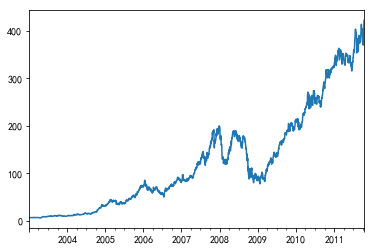

In [222]:
# 对其中任意一列绘图
close_px['AAPL'].plot()

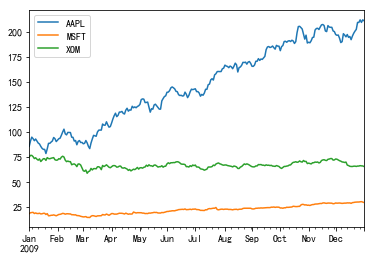

In [223]:
# 对DataFrame绘图
close_px.loc['2009'].plot()

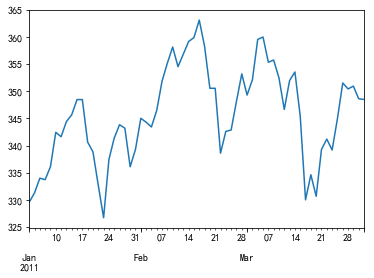

In [224]:
# 特定时间的股价
close_px['AAPL'].loc['1/1/2011':'3/31/2011'].plot()

In [225]:
# 季度型频率的数据
appl_q = close_px['AAPL'].resample('Q-DEC').ffill()

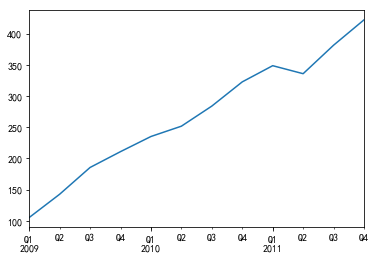

In [226]:
appl_q.loc['2009':].plot()

## 移动窗口函数

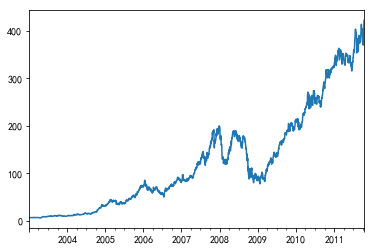

In [227]:
# 在移动窗口上计算的各种统计函数也是一类常见于时间序列的数组变换
# rolling_mean是其中最简单的一个
close_px.AAPL.plot()

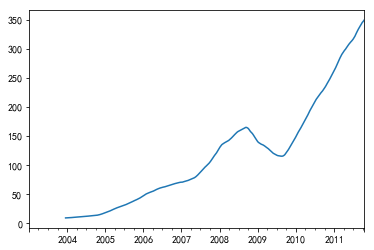

In [228]:
# 250日均线
close_px.AAPL.rolling(window = 250,center=False).mean().plot()

In [229]:
# 250日每日回报标准差
appl_std250 = close_px.AAPL.rolling(window = 250,min_periods=10).std()

In [230]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

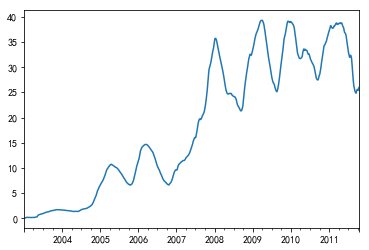

In [231]:
appl_std250.plot()

In [232]:
# 要计算扩展窗口平均，你可以将扩展窗口看做一个特殊的窗口，其长度和时间序列一样，但只需一期（或多期）即可计算一个值：
# 通过rolling定义扩展平均
expanding_mean = lambda x : rolling_mean(x,len(x),min_periods=1)

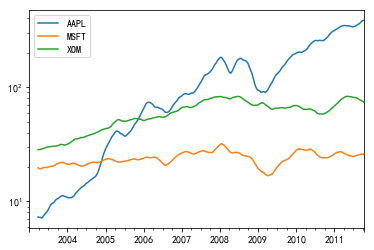

In [233]:
# 对DataFrame调用rolling会将转换应用到所有列上
close_px.rolling(60).mean().plot(logy=True) # 各股价的60日均线（对数Y轴）

In [234]:
%%html
<img src='pic\移动窗口和指数加权函数.png'>

### 指数加权函数

另一种使用固定大小窗口及相等权数观测值的方法是，

定义一个衰减因子（decay factor）常量，以便使近期的观测值拥有更大的权数。

衰减因子的定义方式有很多，比较流行的是使用时间间隔（span），

它可以使结果兼容于窗口大小等于时间间隔的简单移动窗口函数。

由于指数加权统计赋予近期的观测值更大的权重，因此更能适应较快的变化。

In [235]:
aapl_px = close_px.AAPL['2005':'2009']
ma60 = aapl_px.rolling(window=60,min_periods=50).mean()
ewma60 = aapl_px.ewm(span = 60).mean()

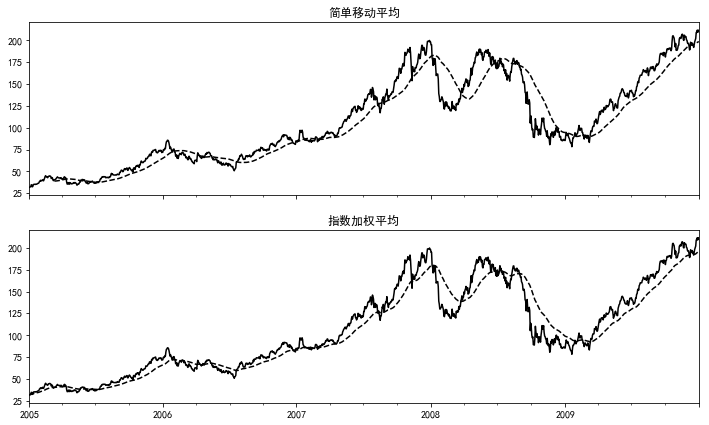

In [236]:
fig,axes = plt.subplots(nrows=2,ncols=1,sharex=True,sharey=True,figsize=(12,7))
aapl_px.plot(style='k-',ax=axes[0])
ma60.plot(style='k--',ax=axes[0])
aapl_px.plot(style='k-',ax=axes[1])
ewma60.plot(style='k--',ax=axes[1])
axes[0].set_title(u'简单移动平均')
axes[1].set_title(u'指数加权平均')

### 二元移动窗口函数

有些统计运算（如相关系数和协方差）需要在两个时间序列上执行。

比如，金融分析师常常对某只股票对某个参数（如标普500指数）的相关系数感兴趣。

我们可以通过计算百分比变化并使用rolling_corr的方式得到该结果。

In [237]:
spx_px = close_px_all['SPX']

In [238]:
spx_rets = spx_px / spx_px.shift(1)-1

In [239]:
returns = close_px.pct_change() # pct_change变动百分比

In [240]:
# AAPL 6个月的回报与标准普尔500指数的相关系数
corr = returns.AAPL.rolling(125,min_periods=100).corr(spx_rets)

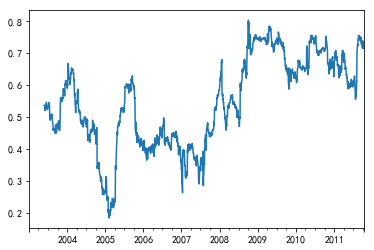

In [241]:
corr.plot()

In [242]:
# 假设想一次性计算多只股票与标准普尔500指数的相关系数。
# 只需要传入一个TimeSeries和一个DF, rolling_corr会自动计算TimeSeries(本例中是spx_rets)于DF各列的相关系数:
corr = returns.rolling(125,min_periods=100).corr(other=spx_rets)

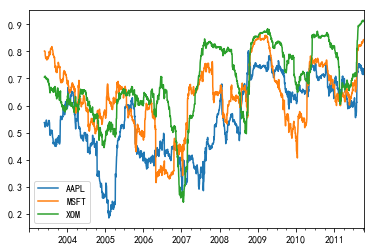

In [243]:
corr.plot()

### 用户定义的移动窗口函数

In [244]:
# rolling_apply函数使得能够在移动窗口上应用子集设计的数组函数。
# 唯一要求是: 该函数要能从数组的各个片段中产生单个值。
# 比如: 当用rolling_quantile计算样本分位数时, 可能对样本中特定值的百分等级感兴趣。
# scipy.stats.percentileofscore函数就能达到目的:
from scipy.stats import percentileofscore

In [245]:
score_at_2percent = lambda x:percentileofscore(x,0.02)

In [246]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)

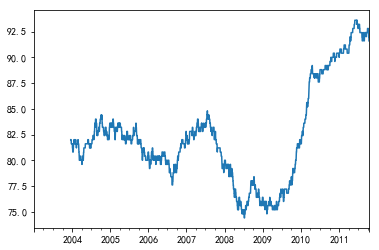

In [247]:
result.plot()